In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

### Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
import folium
from folium import plugins



# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/seattle/listings.csv
/kaggle/input/seattle/reviews.csv
/kaggle/input/seattle/calendar.csv
/kaggle/input/seattle/calendar.csv


In [2]:
# Convert the datasets to a PandasDataframe
listings = pd.read_csv("/kaggle/input/seattle/listings.csv")



print(listings.shape)


(3818, 92)


In [3]:
print(listings.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [4]:

neigh_price = listings[["neighbourhood","price"]]


In [5]:
listings["price"] = listings["price"].str.replace(',', '')



In [6]:
for col in listings:
    listings["price"] = listings["price"].map(lambda x: x.replace('$',''))

In [7]:
listings['price'] = listings['price'].astype('float')

In [8]:
'''
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset
X, y = make_regression(n_samples=100, n_features=100, n_informative=10)
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)
'''

"\n# pearson's correlation feature selection for numeric input and numeric output\nfrom sklearn.datasets import make_regression\nfrom sklearn.feature_selection import SelectKBest\nfrom sklearn.feature_selection import f_regression\n# generate dataset\nX, y = make_regression(n_samples=100, n_features=100, n_informative=10)\n# define feature selection\nfs = SelectKBest(score_func=f_regression, k=10)\n# apply feature selection\nX_selected = fs.fit_transform(X, y)\nprint(X_selected.shape)\n"

In [62]:
# Cleaning the Data 

In [9]:
listings_num = listings.select_dtypes(include = ['float64', 'int64'])
listings_num.head()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
0,241032,20160104002432,956883,3.0,3.0,47.636289,-122.371025,4,1.0,1.0,...,95.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,2,4.07
1,953595,20160104002432,5177328,6.0,6.0,47.639123,-122.365666,4,1.0,1.0,...,96.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,6,1.48
2,3308979,20160104002432,16708587,2.0,2.0,47.629724,-122.369483,11,4.5,5.0,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,2,1.15
3,7421966,20160104002432,9851441,1.0,1.0,47.638473,-122.369279,3,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,278830,20160104002432,1452570,2.0,2.0,47.632918,-122.372471,6,2.0,3.0,...,92.0,9.0,9.0,10.0,10.0,9.0,9.0,NaN,1,0.89


In [10]:

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

                                price
neighbourhood                        
Fairmount Park             370.000000
Industrial District        245.000000
Portage Bay                241.428571
Westlake                   197.000000
Alki                       196.652174
Montlake                   195.947368
Magnolia                   176.000000
Pike Place Market          175.512821
Windermere                 174.700000
Queen Anne                 168.764706
Belltown                   166.627451
Fauntleroy                 164.100000
Central Business District  163.728395
South Lake Union           154.142857
Green Lake                 152.653846
North Admiral              150.187500
Pioneer Square             145.785714
Madrona                    144.300000
Madison Park               143.937500
View Ridge                 143.833333
                       price
neighbourhood               
Mount Baker        95.000000
North Beacon Hill  92.652632
Pike Market        92.000000
South Delridge     

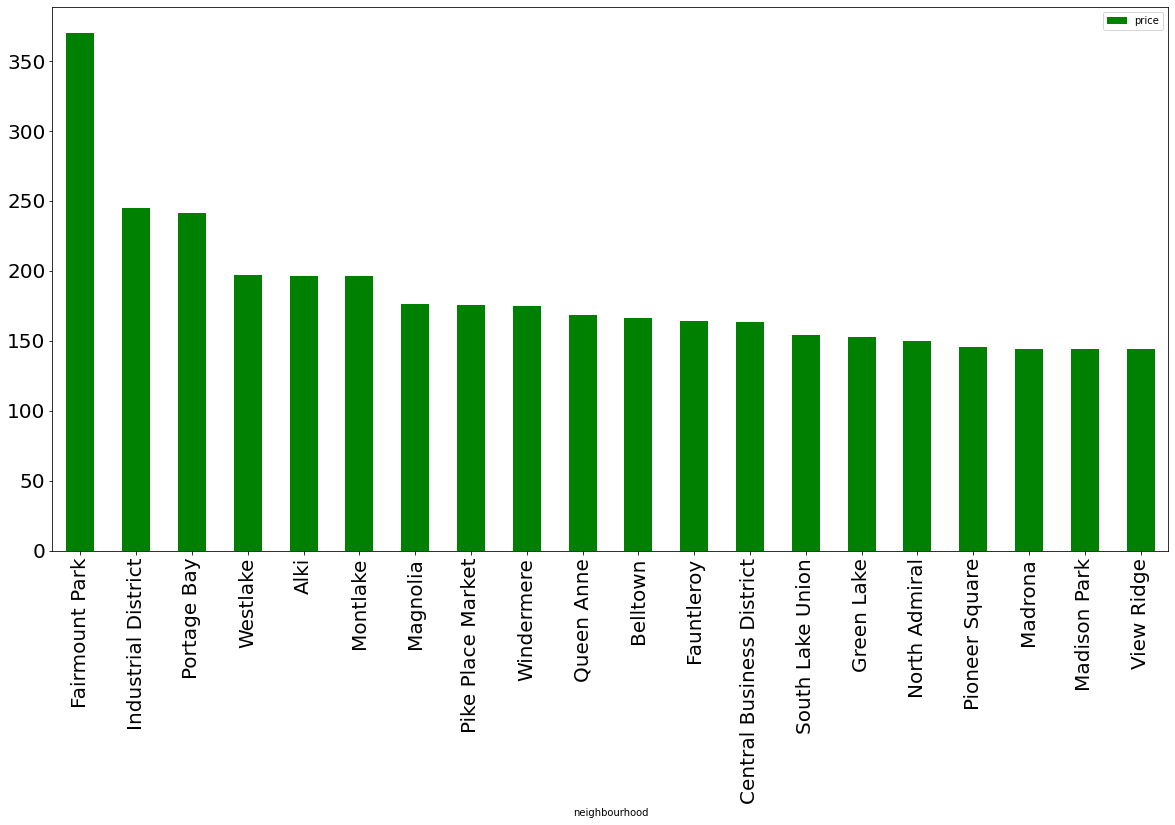

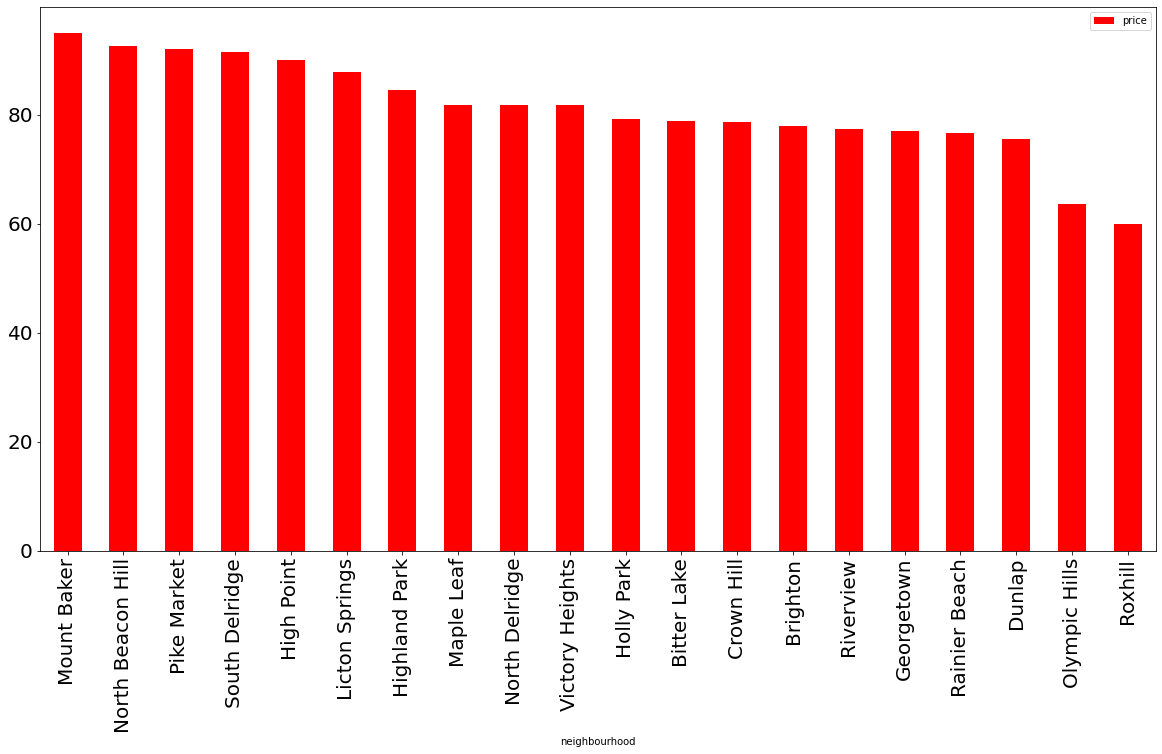

In [63]:
neigh_price_grp = listings.groupby("neighbourhood")["price"].mean()
ok = pd.DataFrame(neigh_price_grp).sort_values('price', ascending=False)
#ok.head(20).plot.bar(figsize=(20,10),fontsize = 20,color="g", )

#ok.tail(20).plot.bar(figsize=(20,10),fontsize = 20,color="r")

print(ok.head(20))
print(ok.tail(20))

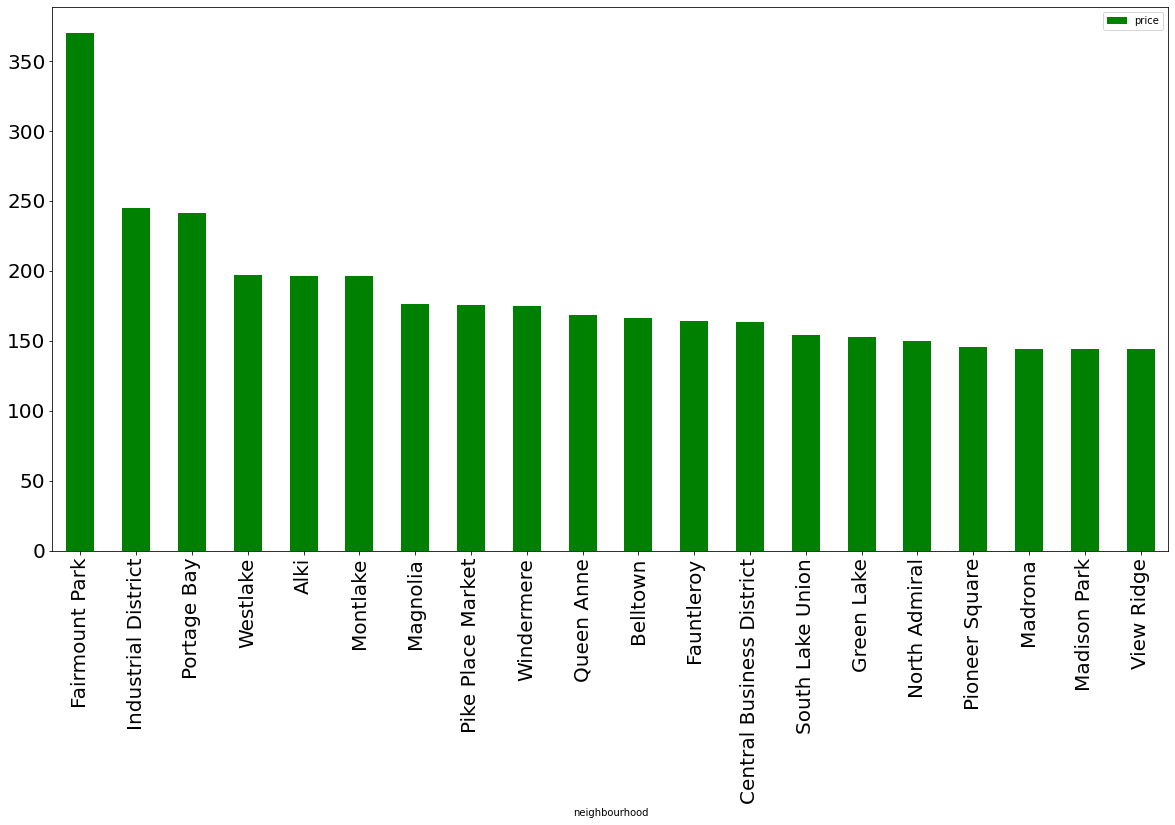

In [65]:
# Higher houses price neighbourhood
ok.head(20).plot.bar(figsize=(20,10),fontsize = 20,color="g", )

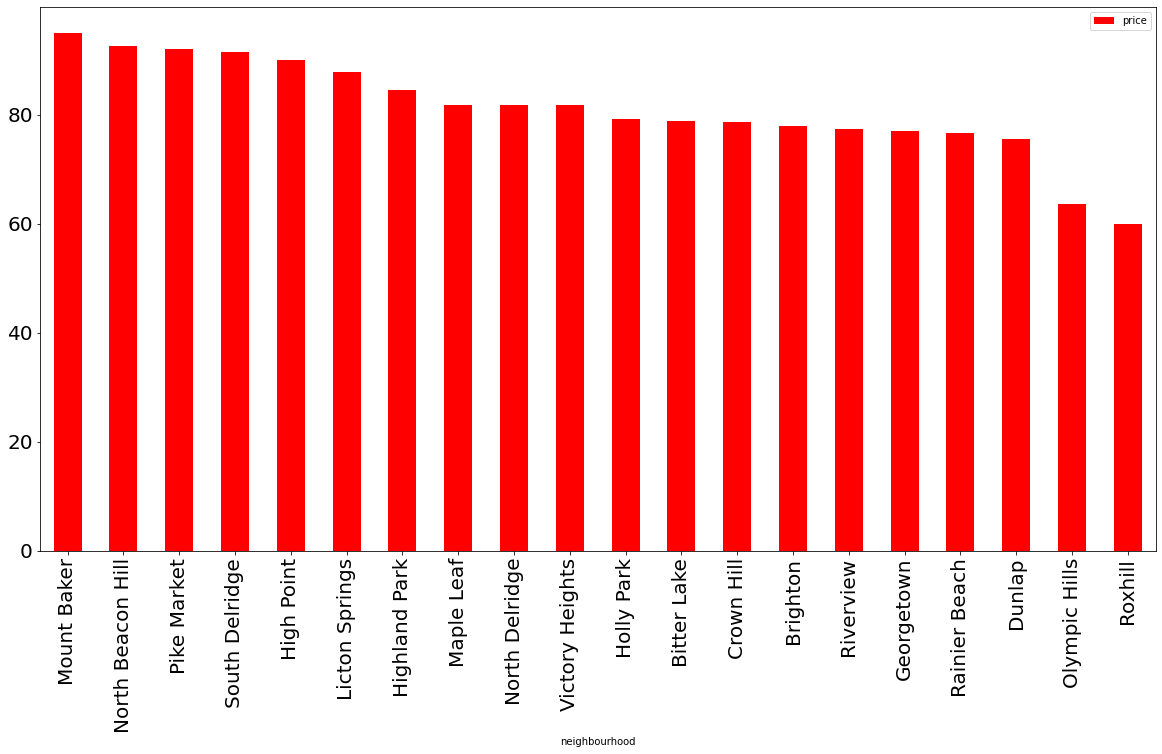

In [67]:
# Cheapest houses price neighbourhood
ok.tail(20).plot.bar(figsize=(20,10),fontsize = 20,color="r")

In [68]:
# Create maps for the two regions

In [12]:
top20 = ok.head(20)
flop20 = ok.tail(20)

top20_loc =  pd.merge(top20, listings, how='right').fillna(0)
flop20_loc = pd.merge(flop20, listings, how='right').fillna(0)


top20_locc = top20_loc[["neighbourhood","price","latitude","longitude","street"]]
flop20_locc = flop20_loc[["neighbourhood","price","latitude","longitude","street"]]

top20_comp = top20_locc.head(20)
flop20_comp = top20_locc.tail(20)


In [13]:
m = folium.Map([47.6062, -122.3321], zoom_start=11)


In [14]:
top20_comp_sub = top20_comp.copy()
for i, row in top20_comp_sub .iterrows():
    folium.Circle([row['latitude'], row['longitude']],
                        radius=10,
                        popup=folium.Popup(row['street']),
                        ).add_to(m)



In [15]:
# Map of higher houses price locations
top20_map = top20_comp_sub [['latitude', 'longitude']].values
# plot heatmap
m.add_child(plugins.HeatMap(top20_map, radius=20))
m

In [16]:
flop20_comp_sub = flop20_comp.copy()
for i, row in flop20_comp_sub .iterrows():
    folium.Circle([row['latitude'], row['longitude']],
                        radius=10,
                        popup=folium.Popup(row['street']),
                        ).add_to(m)

In [17]:
# Map of higher houses price locations
flop20_map = flop20_comp_sub [['latitude', 'longitude']].values
# plot heatmap
m.add_child(plugins.HeatMap(flop20_map, radius=20))
m

                      price
property_type              
Apartment        122.932670
Bed & Breakfast  112.054054
Boat             282.375000
Bungalow         115.615385
Cabin            104.666667
Camper/RV        120.461538
Chalet            98.500000
Condominium      151.109890
Dorm              39.500000
House            132.351414
Loft             135.700000
Tent              54.000000
Townhouse        129.457627
Treehouse        101.000000
Yurt             100.000000


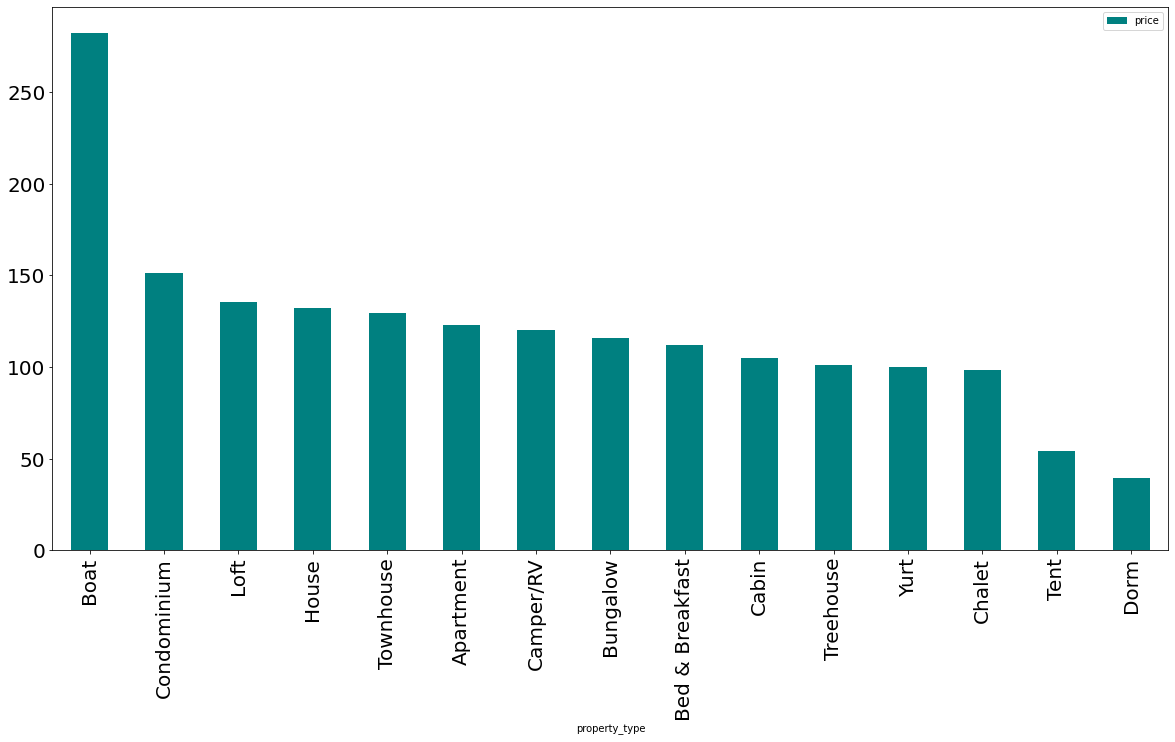

In [18]:
# Different properties types prices
property_type_price = listings.groupby("property_type")["price"].mean()

prtype= pd.DataFrame(property_type_price).drop(["Other"])
print(prtype)
prtype.sort_values('price', ascending=False).plot.bar(figsize=(20,10),fontsize = 20,color="teal")



In [ ]:
# EDA of differente features of house prices

In [19]:
grouped_property_type = listings.groupby('property_type').agg({'price': ['mean']}).reset_index().set_index('property_type')
proptype=grouped_property_type
proptype

,price
,mean
property_type,
Apartment,122.932670
Bed & Breakfast,112.054054
Boat,282.375000
Bungalow,115.615385
Cabin,104.666667
Camper/RV,120.461538
Chalet,98.500000
Condominium,151.109890


In [20]:
'''
"ax = prtype.plot.bar(rot=10,figsize=(20,10))"

prtype.plot(kind='barh',y='property_type',x='price',color='r')
"ax.legend(fontsize = 20)"
axes = proptype.plot.bar(rot=1, subplots=True)
axes[1].legend(loc=2)
'''

'\n"ax = prtype.plot.bar(rot=10,figsize=(20,10))"\n\nprtype.plot(kind=\'barh\',y=\'property_type\',x=\'price\',color=\'r\')\n"ax.legend(fontsize = 20)"\naxes = proptype.plot.bar(rot=1, subplots=True)\naxes[1].legend(loc=2)\n'

In [21]:
grouped_city = listings.groupby('city').agg({'price': ['mean', 'min', 'max']})
grouped_city

price               
                             mean    min     max
city                                            
Ballard, Seattle       116.000000  116.0   116.0
Phinney Ridge Seattle   60.000000   60.0    60.0
Seattle                128.052231   20.0  1000.0
Seattle                 97.500000   65.0   130.0
West Seattle           110.000000   90.0   130.0
seattle                105.000000  105.0   105.0
西雅图                     38.000000   38.0    38.0

In [22]:
grouped_number_of_reviews = listings.groupby('number_of_reviews').agg({'price': ['mean', 'min', 'max']})
grouped_number_of_reviews


price              
                         mean   min     max
number_of_reviews                          
0                  132.443381  20.0   700.0
1                  151.596774  22.0  1000.0
2                  140.116071  25.0   600.0
3                  131.535032  25.0   500.0
4                  129.868750  25.0   525.0
...                       ...   ...     ...
320                 89.000000  89.0    89.0
353                 65.000000  65.0    65.0
404                 75.000000  75.0    75.0
466                 89.000000  89.0    89.0
474                 89.000000  89.0    89.0

[195 rows x 3 columns]

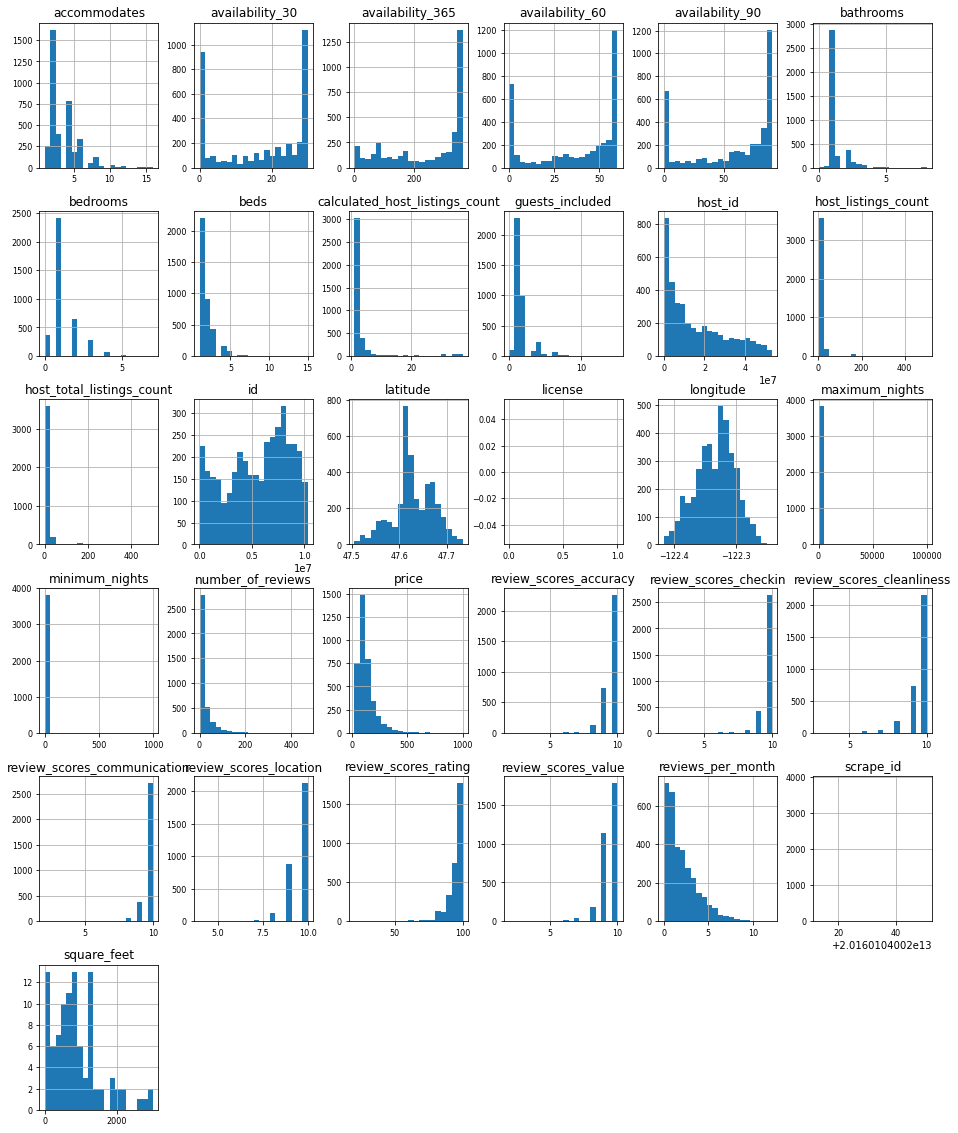

In [23]:
listings_num.hist(figsize=(16, 20), bins=20, xlabelsize=8, ylabelsize=8);

In [24]:
listings_corr = listings.corr()['price']# -1 because the latest row is SalePrice
golden_features_list = listings_corr[abs(listings_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 6 strongly correlated values with SalePrice:
price           1.000000
accommodates    0.652218
bedrooms        0.627720
beds            0.589525
square_feet     0.531752
bathrooms       0.516424
Name: price, dtype: float64


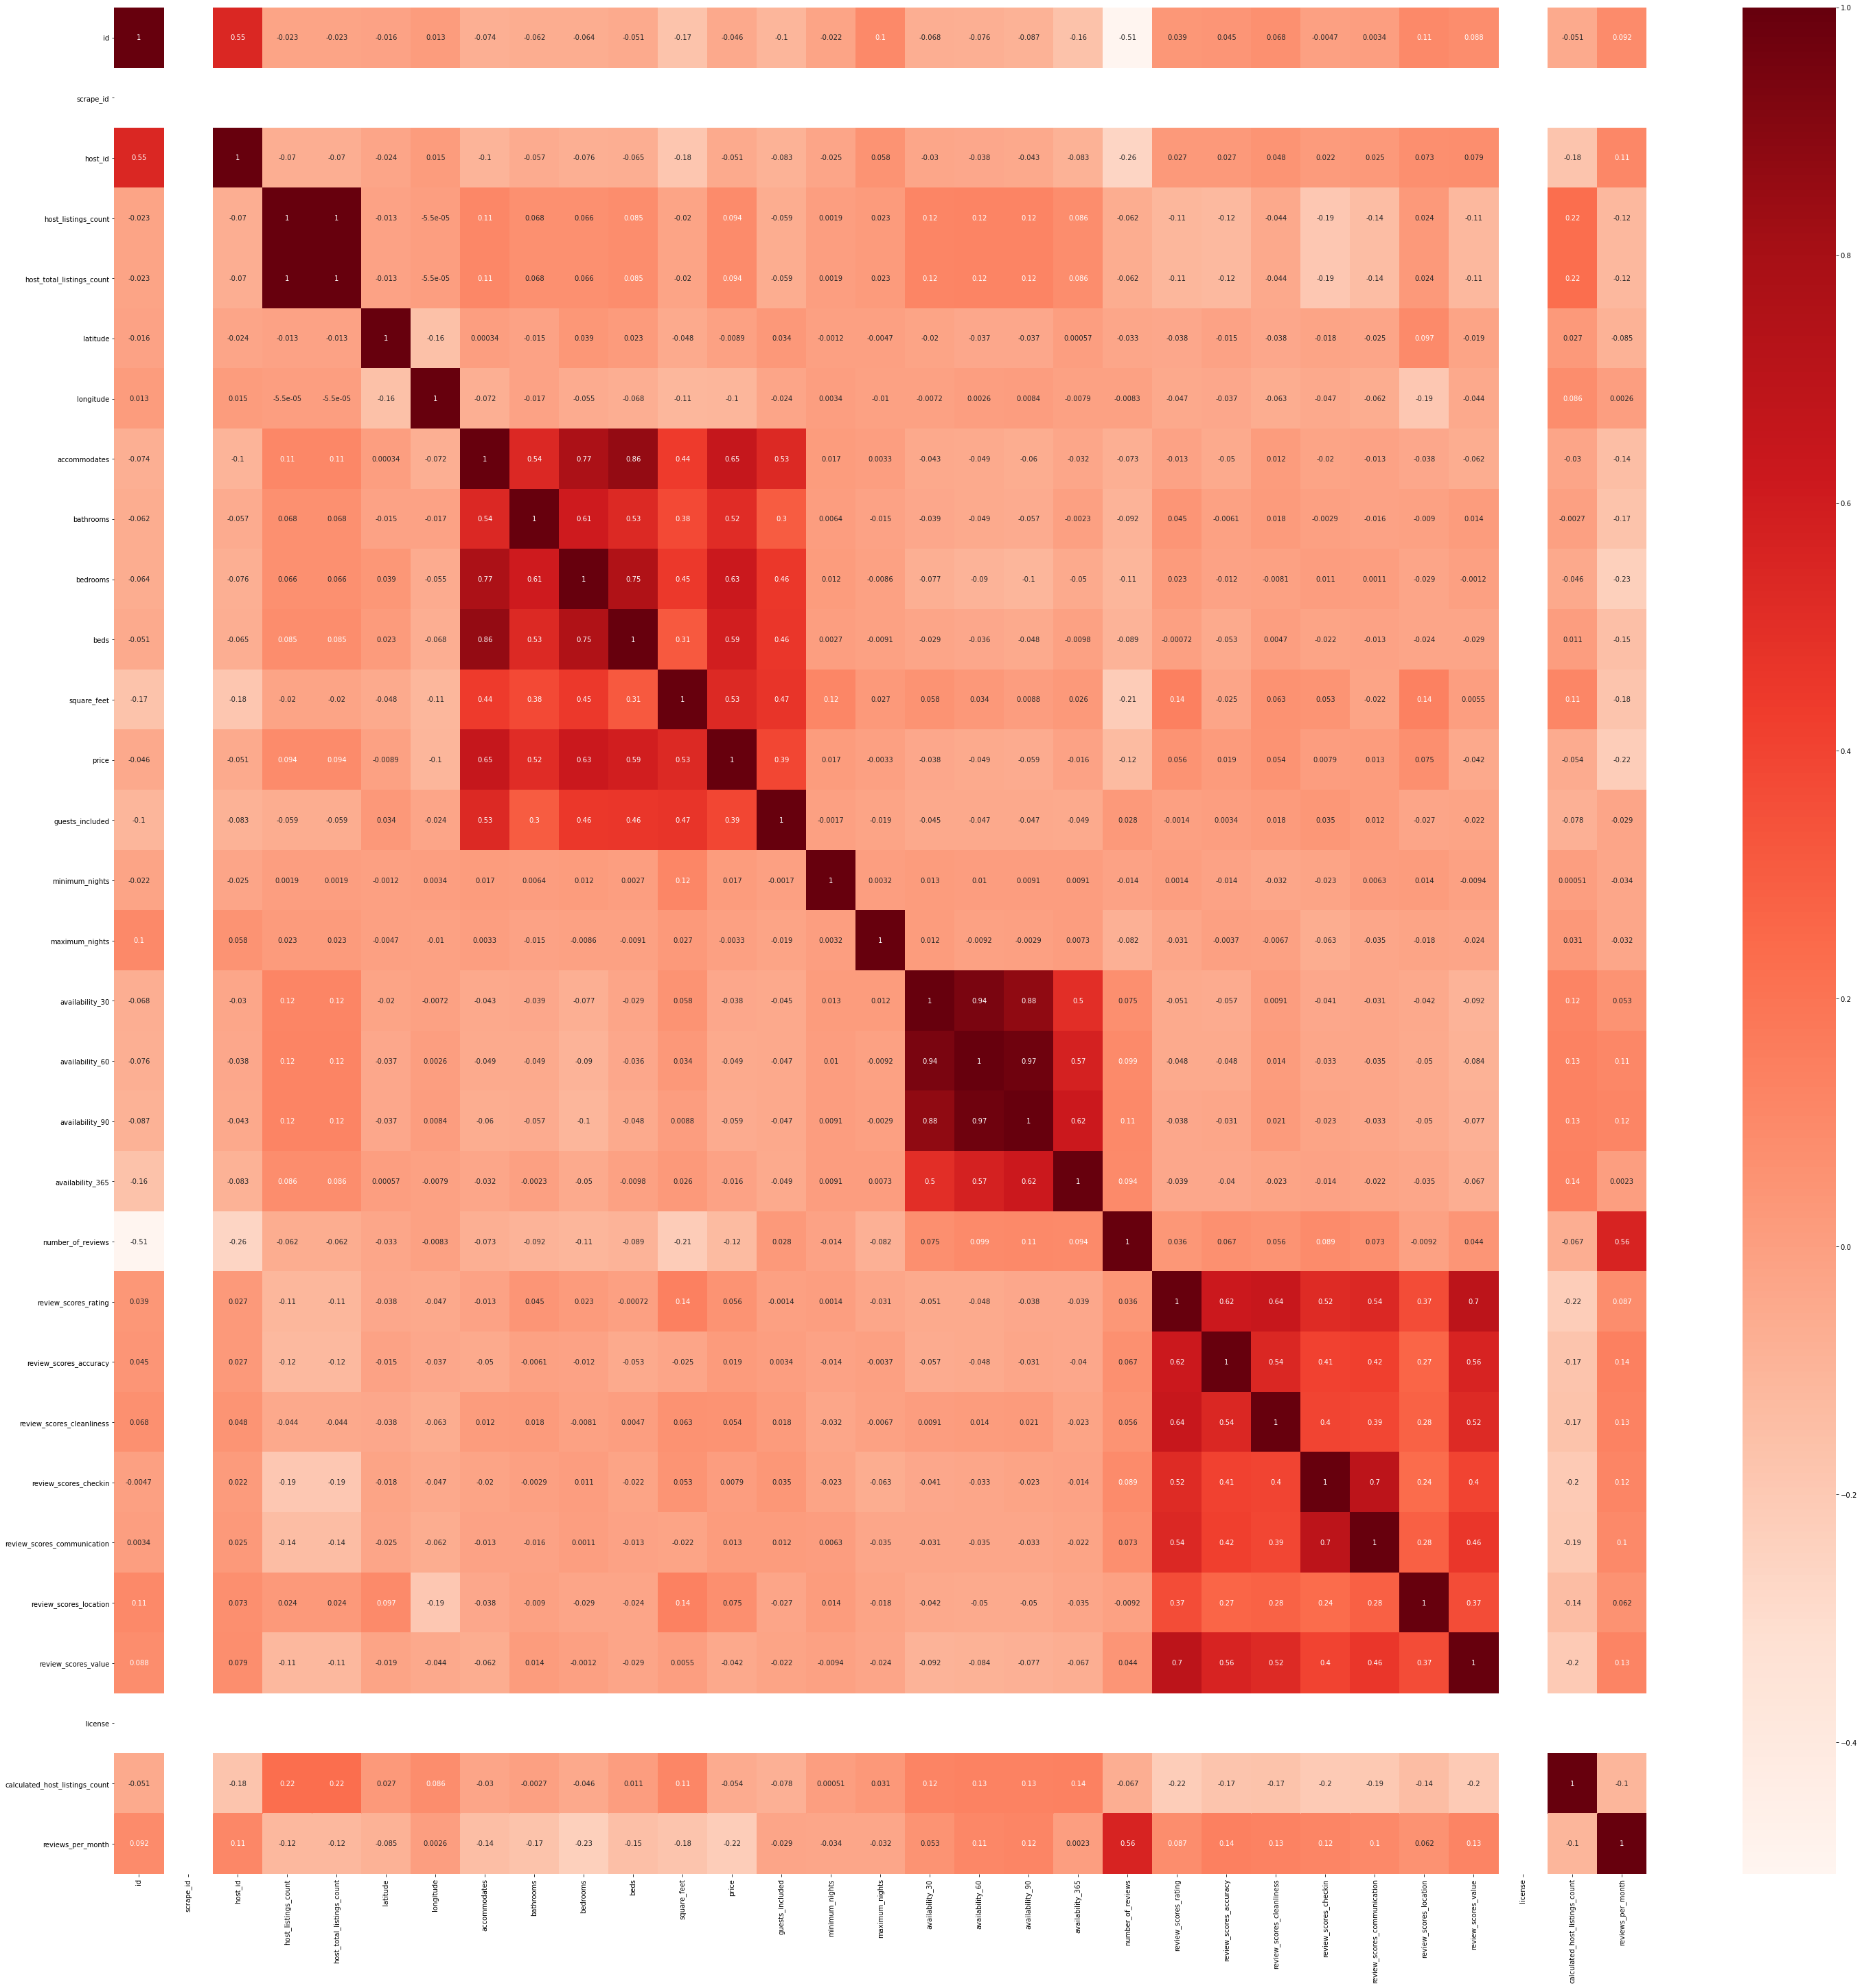

In [25]:
# Heatmap of houses features:
import seaborn as sns
plt.figure(figsize=(50,50))
cor = listings.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

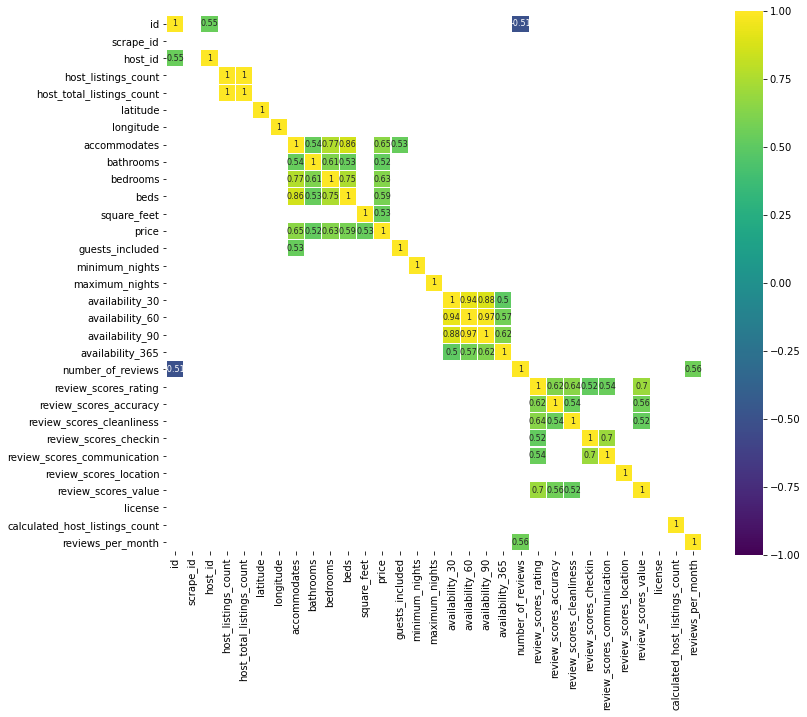

In [26]:
corrr = listings_num.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corrr[(corrr >= 0.5) | (corrr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

In [27]:
cor["price"]

id                               -0.046289
scrape_id                              NaN
host_id                          -0.051332
host_listings_count               0.093962
host_total_listings_count         0.093962
latitude                         -0.008904
longitude                        -0.102420
accommodates                      0.652218
bathrooms                         0.516424
bedrooms                          0.627720
beds                              0.589525
square_feet                       0.531752
price                             1.000000
guests_included                   0.392875
minimum_nights                    0.017297
maximum_nights                   -0.003336
availability_30                  -0.037653
availability_60                  -0.049336
availability_90                  -0.058810
availability_365                 -0.015550
number_of_reviews                -0.124695
review_scores_rating              0.055551
review_scores_accuracy            0.019026
review_scor

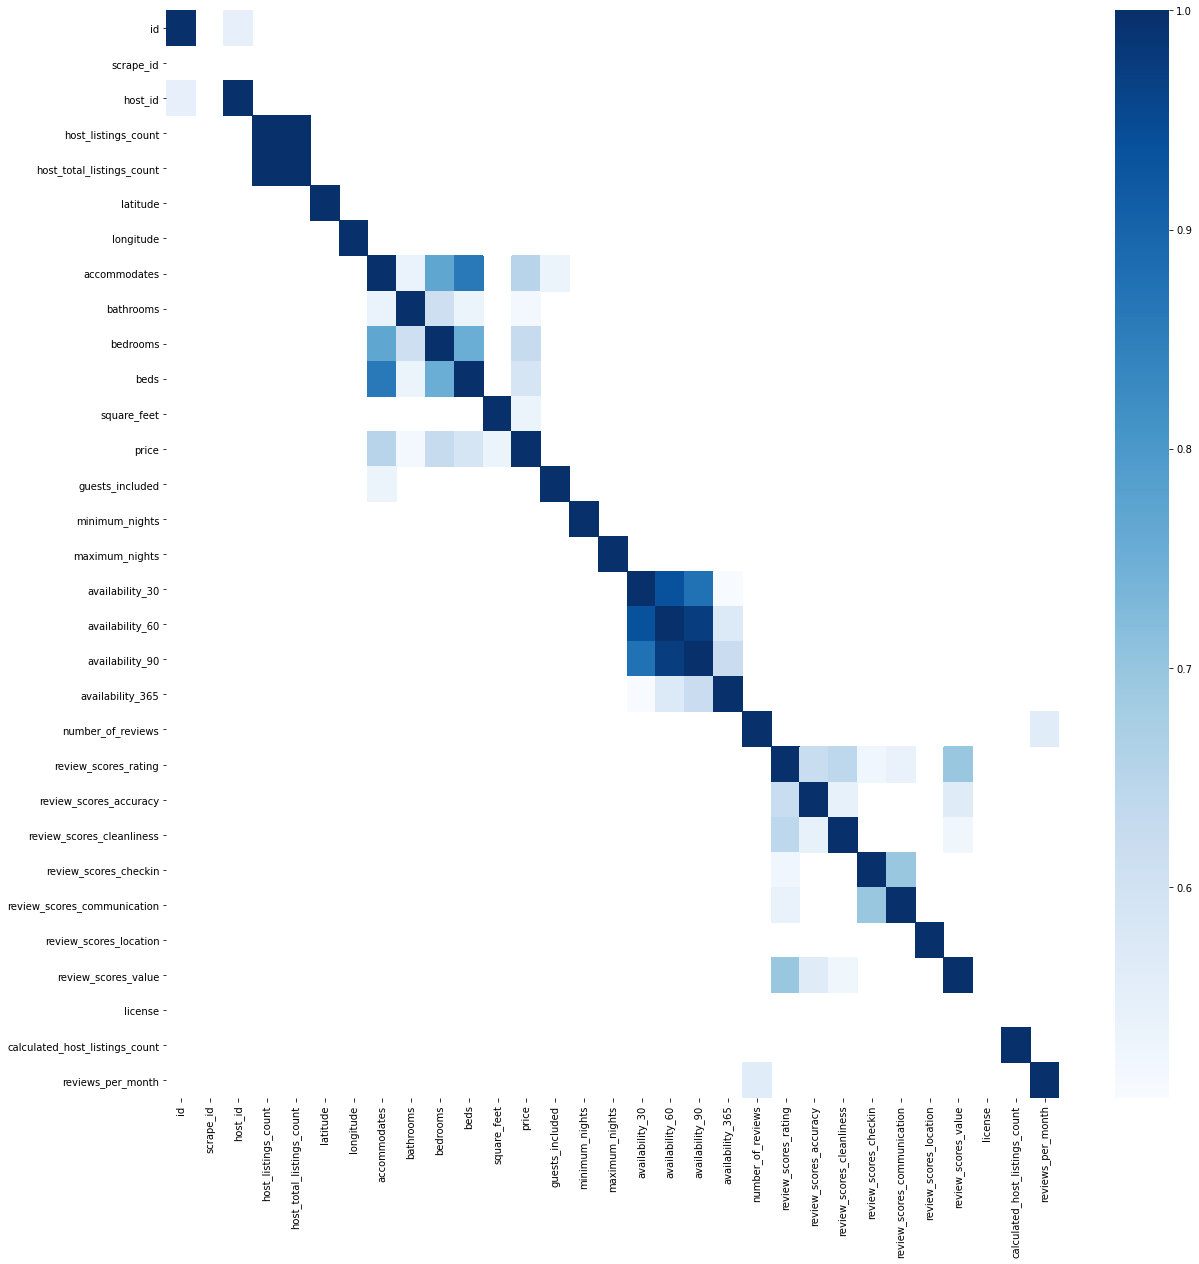

In [28]:
# Heatmap of houses features that have 0.5 correlation or more with the price 

kot = cor[cor>=.5]
plt.figure(figsize=(20,20))
sns.heatmap(kot, cmap="Blues")


In [29]:
important_listings1 = listings[['accommodates','bathrooms','bedrooms','beds','price']]
print(important_listings1.shape)
print(important_listings1.info())
print(important_listings1.describe())



(3818, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   accommodates  3818 non-null   int64  
 1   bathrooms     3802 non-null   float64
 2   bedrooms      3812 non-null   float64
 3   beds          3817 non-null   float64
 4   price         3818 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 149.3 KB
None
       accommodates    bathrooms     bedrooms         beds        price
count   3818.000000  3802.000000  3812.000000  3817.000000  3818.000000
mean       3.349398     1.259469     1.307712     1.735394   127.976166
std        1.977599     0.590369     0.883395     1.139480    90.250022
min        1.000000     0.000000     0.000000     1.000000    20.000000
25%        2.000000     1.000000     1.000000     1.000000    75.000000
50%        3.000000     1.000000     1.000000     1.000000   100.000000
75%        4.000000   

In [30]:
important_listings2 = listings[['accommodates', 'bedrooms', 'bathrooms','minimum_nights','maximum_nights','number_of_reviews','price']]
print(important_listings2.shape)
print(important_listings2.info())
print(important_listings2.describe())

(3818, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   accommodates       3818 non-null   int64  
 1   bedrooms           3812 non-null   float64
 2   bathrooms          3802 non-null   float64
 3   minimum_nights     3818 non-null   int64  
 4   maximum_nights     3818 non-null   int64  
 5   number_of_reviews  3818 non-null   int64  
 6   price              3818 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 208.9 KB
None
       accommodates     bedrooms    bathrooms  minimum_nights  maximum_nights  \
count   3818.000000  3812.000000  3802.000000     3818.000000     3818.000000   
mean       3.349398     1.307712     1.259469        2.369303      780.447617   
std        1.977599     0.883395     0.590369       16.305902     1683.589007   
min        1.000000     0.000000     0.000000        1.000000        1.

In [31]:
important_listings1.head()


,accommodates,bathrooms,bedrooms,beds,price
0,4,1.0,1.0,1.0,85.0
1,4,1.0,1.0,1.0,150.0
2,11,4.5,5.0,7.0,975.0
3,3,1.0,0.0,2.0,100.0
4,6,2.0,3.0,3.0,450.0


In [32]:
'''
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = important_listings.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
'''

'\n#Using Pearson Correlation\nimport seaborn as sns\nplt.figure(figsize=(12,10))\ncor = important_listings.corr()\nsns.heatmap(cor, annot=True, cmap=plt.cm.Reds)\nplt.show()\n'

In [ ]:
# cleaning the "important_listings1"

In [33]:
null = important_listings1.isnull().sum()
null

accommodates     0
bathrooms       16
bedrooms         6
beds             1
price            0
dtype: int64

In [34]:
null = important_listings2.isnull().sum()
null

accommodates          0
bedrooms              6
bathrooms            16
minimum_nights        0
maximum_nights        0
number_of_reviews     0
price                 0
dtype: int64

In [35]:
important_listings1.dropna(axis=0,how='any',inplace=True)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
important_listings2.dropna(axis=0,how='any',inplace=True)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
important_listings1.isnull().sum().sum()
important_listings1.shape

(3796, 5)

In [38]:
important_listings1.head()

,accommodates,bathrooms,bedrooms,beds,price
0,4,1.0,1.0,1.0,85.0
1,4,1.0,1.0,1.0,150.0
2,11,4.5,5.0,7.0,975.0
3,3,1.0,0.0,2.0,100.0
4,6,2.0,3.0,3.0,450.0


In [39]:
'''
dummies = pd.get_dummies(important_listings['property_type']).rename(columns=lambda x: 'property_type' + str(x))
important_listings_new = pd.concat([important_listings, dummies], axis=1)

important_listings_new.shape
'''

"\ndummies = pd.get_dummies(important_listings['property_type']).rename(columns=lambda x: 'property_type' + str(x))\nimportant_listings_new = pd.concat([important_listings, dummies], axis=1)\n\nimportant_listings_new.shape\n"

In [40]:
'''
important_listings_new = important_listings_new.loc[:,~important_listings_new.columns.duplicated()]
important_listings_new
'''


'\nimportant_listings_new = important_listings_new.loc[:,~important_listings_new.columns.duplicated()]\nimportant_listings_new\n'

In [41]:
'''
data = important_listings_new.drop(['property_type'], axis=1)
data.shape
'''

"\ndata = important_listings_new.drop(['property_type'], axis=1)\ndata.shape\n"

In [42]:
'''
important_listings = important_listings.loc[:,~important_listings.columns.duplicated()]
important_listings
'''

'\nimportant_listings = important_listings.loc[:,~important_listings.columns.duplicated()]\nimportant_listings\n'

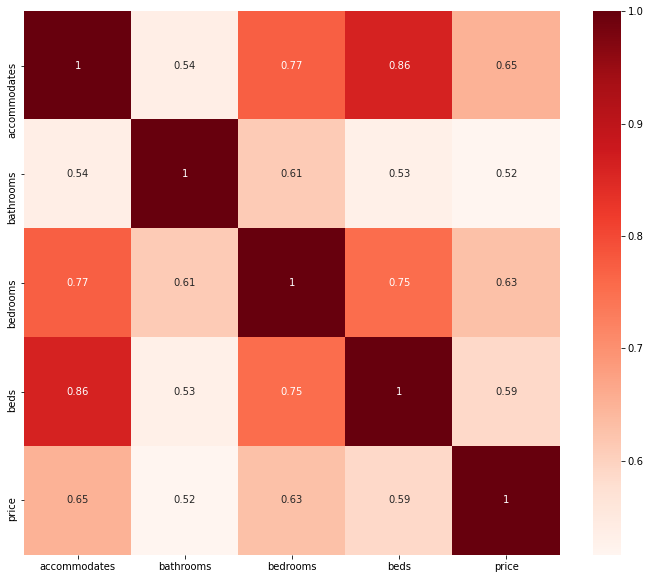

In [43]:
#Using Pearson Correlation
# Heatmap of the price and features correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = important_listings1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

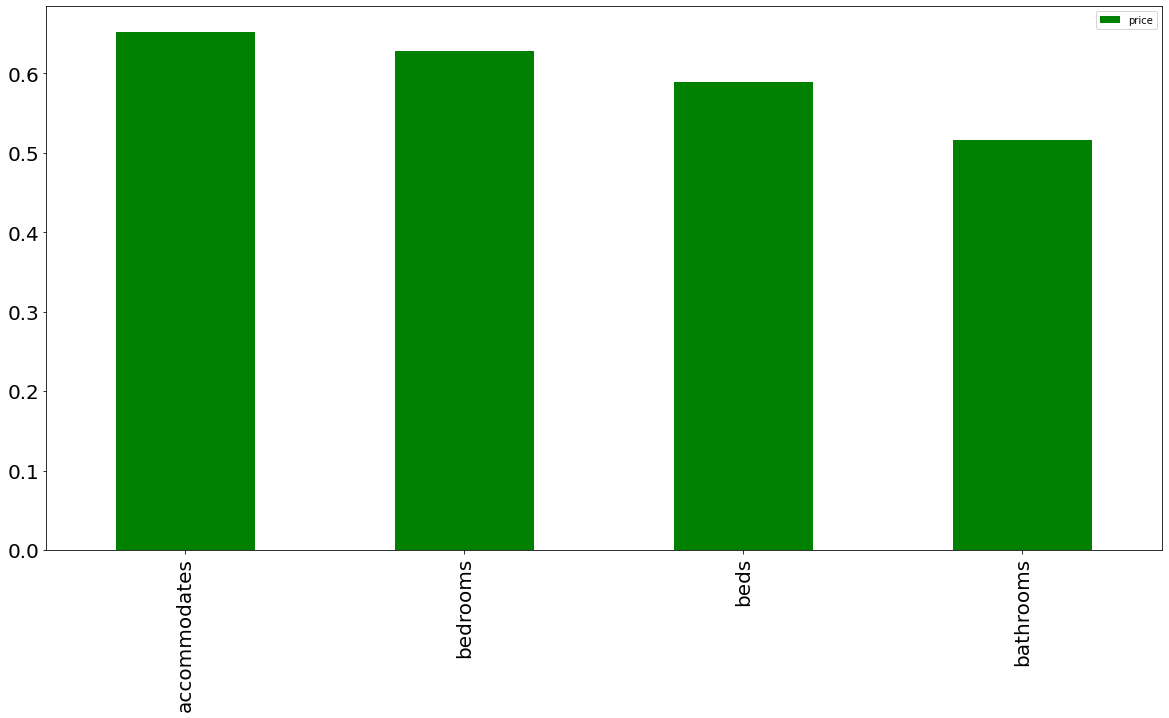

In [44]:
cor = important_listings1.corr().drop(['price'])
cor_df = pd.DataFrame(cor["price"]).sort_values('price', ascending=False).plot.bar(figsize=(20,10),fontsize = 20,color="g")
cor_df

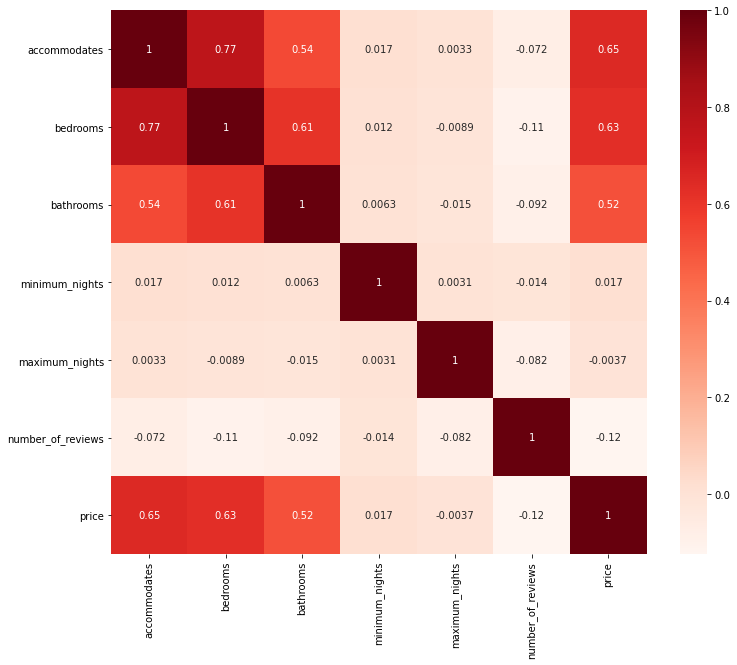

In [45]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(12,10))
cor = important_listings2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [46]:
#cols= important_listings[["accommodates","bathrooms","bedrooms","price","minimum_nights","maximum_nights","number_of_reviews"]]

In [47]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data2 = scaler.fit(important_listings)
data2
'''

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler = MinMaxScaler()\ndata2 = scaler.fit(important_listings)\ndata2\n'

In [48]:
# Split the data 
train_df = important_listings1.iloc[0:2847]
test_df = important_listings1.iloc[2847:]
train_df

,accommodates,bathrooms,bedrooms,beds,price
0,4,1.0,1.0,1.0,85.0
1,4,1.0,1.0,1.0,150.0
2,11,4.5,5.0,7.0,975.0
3,3,1.0,0.0,2.0,100.0
4,6,2.0,3.0,3.0,450.0
...,...,...,...,...,...
2861,2,1.0,1.0,1.0,104.0
2862,5,1.0,1.0,2.0,180.0
2863,2,1.0,1.0,1.0,150.0
2864,7,2.0,2.0,4.0,240.0


In [49]:
train_df2 = important_listings2.iloc[0:2847]
test_df2 = important_listings2.iloc[2847:]
train_df2

,accommodates,bedrooms,bathrooms,minimum_nights,maximum_nights,number_of_reviews,price
0,4,1.0,1.0,1,365,207,85.0
1,4,1.0,1.0,2,90,43,150.0
2,11,5.0,4.5,4,30,20,975.0
3,3,0.0,1.0,1,1125,0,100.0
4,6,3.0,2.0,1,1125,38,450.0
...,...,...,...,...,...,...,...
2861,2,1.0,1.0,1,1125,22,104.0
2862,5,1.0,1.0,5,30,8,180.0
2863,2,1.0,1.0,1,90,14,150.0
2864,7,2.0,2.0,3,30,11,240.0


In [50]:
knn=KNeighborsRegressor(n_neighbors=5,algorithm="brute")



In [ ]:
# Predict houses prices using two features

In [51]:
two_features=["accommodates","bathrooms"]

knn.fit(train_df[two_features],train_df["price"])


predictions=knn.predict(test_df[two_features])



In [52]:
from sklearn.metrics import mean_squared_error


two_features_mse=mean_squared_error(test_df["price"],predictions)
two_features_rmse=two_features_mse**(1/2)

print(two_features_mse)
print(two_features_rmse)

5031.201390937828
70.93096214586285


In [ ]:
# Predict houses prices using three features

In [53]:

three_features = ['accommodates', 'bedrooms', 'bathrooms']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

knn.fit(train_df[three_features],train_df["price"])
three_predictions=knn.predict(test_df[three_features])

four_mse=mean_squared_error(test_df["price"],three_predictions)

four_rmse=four_mse**(1/2)

print(four_mse)
print(four_rmse)

4731.840590094836
68.78837539944404


In [ ]:
# Predict houses prices using the features that have the highest correlations with the price

In [54]:

# First prediction important_listings1
features = ['accommodates', 'bedrooms', 'bathrooms']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

knn.fit(train_df[features],train_df["price"])
four_predictions=knn.predict(test_df[features])

mse=mean_squared_error(test_df["price"],four_predictions)

rmse=mse**(1/2)

print(mse)
print(rmse)

4731.840590094836
68.78837539944404


In [ ]:
# Predict houses prices using the features that we have selected 

In [55]:
# Second prediction important_listings2
features2 = ['accommodates', 'bedrooms', 'bathrooms','minimum_nights','maximum_nights','number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5, algorithm='brute')

knn.fit(train_df2[features2],train_df2["price"])
four_predictions=knn.predict(test_df2[features2])

mse2=mean_squared_error(test_df2["price"],four_predictions)

rmse2=mse2**(1/2)

print(mse2)
print(rmse2)

5665.600379346681
75.27018253828457


In [56]:
# Comparing the two results

mse12 = [mse,mse2]
rmse12 = [rmse,rmse2]
rmse_ovrl=[rmse,rmse2]
evaluation = pd.DataFrame(
    {"mse12":mse12,
     "rmse12":rmse12
    })
    
    


evaluation


,mse12,rmse12
0,4731.840590,68.788375
1,5665.600379,75.270183
